# Overview
This jupyter notebook covers the following contents:
1. Default configuration in LIBERO
2. Basic information about available LIBERO benchmarks
   - Get a dictionary of mapping from benchmark name to benchmark class
   - Check the integrity of benchmarks
   - Check the integrity of init files
   - Visualize all the init states of a task
   - Download datasets
   - Get information about a demonstration file and replay a trajectory


In [2]:
from libero.libero import benchmark, get_libero_path
import matplotlib.pyplot as plt
import open3d as o3d
import numpy as np
import imageio
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
def cammat2o3d(cam_mat, width, height):
    cx = cam_mat[0,2]
    fx = cam_mat[0,0]
    cy = cam_mat[1,2]
    fy = cam_mat[1,1]

    return o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)

def verticalFlip(img):
    return np.flip(img, axis=0)

def get_camera_position(sim, camera_name):
    camera_id = sim.model.camera_name2id(camera_name)
    camera_pos = sim.model.body_pos[camera_id]
    return camera_pos

def visualize_rgb_depth(rgb_img, depth_img):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(verticalFlip(rgb_img))
    ax[0].set_title("RGB Image")
    ax[0].axis('off')  # Hide the axis
    cax = ax[1].imshow(verticalFlip(depth_img), cmap='tab20b')
    ax[1].set_title("Depth Image")
    ax[1].axis('off')  # Hide the axis
    fig.colorbar(cax, ax=ax[1])
    plt.show()

def create_video(images: list, name: str = "recording", show: bool = False):
    video_writer = imageio.get_writer("output.mp4", fps=60)
    for image in images:
        video_writer.append_data(image[::-1])
    video_writer.close()

    if show:
        HTML("""
            <video width="640" height="480" controls>
                <source src="output.mp4" type="video/mp4">
            </video>
            <script>
                var video = document.getElementsByTagName('video')[0];
                video.playbackRate = 2.0; // Increase the playback speed to 2x
                </script>    
        """)

In [5]:

bddl_files_default_path = get_libero_path("bddl_files")

datasets = "libero_object" # "all", "libero_goal", "libero_spatial", "libero_object", "libero_100"
benchmark_dict = benchmark.get_benchmark_dict()
benchmark_instance = benchmark_dict[datasets]()
num_tasks = benchmark_instance.get_num_tasks()
demo_files = [os.path.join('/home/andang/neurips_2025/LIBERO/libero/datasets', benchmark_instance.get_task_demonstration(i)) for i in range(num_tasks)]

print(demo_files)

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_alphabet_soup_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_cream_cheese_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_salad_dressing_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_bbq_sauce_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_ketchup_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_tomato_sauce_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_object/pick_up_the_butter_and_place_it_in_the_basket_demo.hdf5', '/home/andang/neurips_2025/LIBERO/libero/datasets/libero_o

In [ ]:
import h5py
from pathlib import Path
import json
from libero.libero.envs import OffScreenRenderEnv


demo_file = Path(demo_files[0])
bddl_path = str(Path(bddl_files_default_path) / demo_file.parent.stem / (demo_file.stem[:-5] + '.bddl'))

with h5py.File(demo_file, "r") as f:
    env_metadata = json.loads(f["data"].attrs["env_args"])
    print(env_metadata.keys())
    data = f['data']
    demo = data['demo_0']
    states = demo['states'][()]
    print("Keys:")
    print(f'f.keys()={f.keys()}')
    print(f'data.keys()={data.keys()}')
    print(f'demo.keys()={demo.keys()}')
    print(f'states.shape={states.shape}') # state is all you need to setup the scene
    print()
    print(f'demo["obs"].keys()={demo["obs"].keys()}')
    print(f'demo["obs"]["agentview_rgb"]={demo["obs"]["agentview_rgb"]}')
    print(f'demo["obs"]["eye_in_hand_rgb"]={demo["obs"]["eye_in_hand_rgb"]}')

dict_keys(['type', 'env_name', 'problem_name', 'bddl_file', 'env_kwargs'])
Keys:
f.keys()=<KeysViewHDF5 ['data']>
data.keys()=<KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_11', 'demo_12', 'demo_13', 'demo_14', 'demo_15', 'demo_16', 'demo_17', 'demo_18', 'demo_19', 'demo_2', 'demo_20', 'demo_21', 'demo_22', 'demo_23', 'demo_24', 'demo_25', 'demo_26', 'demo_27', 'demo_28', 'demo_29', 'demo_3', 'demo_30', 'demo_31', 'demo_32', 'demo_33', 'demo_34', 'demo_35', 'demo_36', 'demo_37', 'demo_38', 'demo_39', 'demo_4', 'demo_40', 'demo_41', 'demo_42', 'demo_43', 'demo_44', 'demo_45', 'demo_46', 'demo_47', 'demo_48', 'demo_49', 'demo_5', 'demo_6', 'demo_7', 'demo_8', 'demo_9']>
demo.keys()=<KeysViewHDF5 ['actions', 'dones', 'obs', 'rewards', 'robot_states', 'states']>
states.shape=(148, 110)

demo["obs"].keys()=<KeysViewHDF5 ['agentview_rgb', 'ee_ori', 'ee_pos', 'ee_states', 'eye_in_hand_rgb', 'gripper_states', 'joint_states']>
demo["obs"]["agentview_rgb"]=<HDF5 dataset "agentview_rgb": sha

In [ ]:
import h5py
from pathlib import Path
import json
from libero.libero.envs import OffScreenRenderEnv


demo_file = Path(demo_files[0])
bddl_path = str(Path(bddl_files_default_path) / demo_file.parent.stem / (demo_file.stem[:-5] + '.bddl'))

with h5py.File(demo_file, "r") as f:
    env_metadata = json.loads(f["data"].attrs["env_args"])
    data = f['data']
    demo = data['demo_0']
    states = demo['states'][()]

env_kwargs = env_metadata['env_kwargs']
env_kwargs['controller'] = env_kwargs.pop('controller_configs')['type']
env_kwargs['camera_depths'] = True
env_kwargs['bddl_file_name'] = bddl_path

camera_heights, camera_widths = env_kwargs['camera_heights'], env_kwargs['camera_widths']

kwargs = dict(bddl_file_name=bddl_path, camera_heights=camera_heights, camera_widths=camera_widths, camera_depths=True)
env = OffScreenRenderEnv(**kwargs)
env.reset()

for state in states: # state: (T, S) where T is the number of frames and S is the state dim
    obs = env.set_init_state(state)

camera_names = env_kwargs['camera_names']
camera_name = camera_names[1]

rgb_img, depth_img = obs[camera_name + "_image"], obs[camera_name + "_depth"]

(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)
(110,)

In [9]:
from robosuite.utils.camera_utils import get_camera_intrinsic_matrix

camera_height, camera_width = env_kwargs['camera_heights'], env_kwargs['camera_widths']
camera_names = env_kwargs['camera_names']
camera_name = camera_names[1]

rgb_img, depth_img = obs[camera_name + "_image"], obs[camera_name + "_depth"]


img_height, img_width = rgb_img.shape[:-1]
rgb_img, depth_img = o3d.cuda.pybind.geometry.Image(rgb_img), o3d.cuda.pybind.geometry.Image(depth_img)
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(rgb_img, depth_img)

intrinsic_matrix = get_camera_intrinsic_matrix(env.sim, camera_name, camera_heights, camera_widths)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(camera_heights, camera_widths, intrinsic_matrix)
)

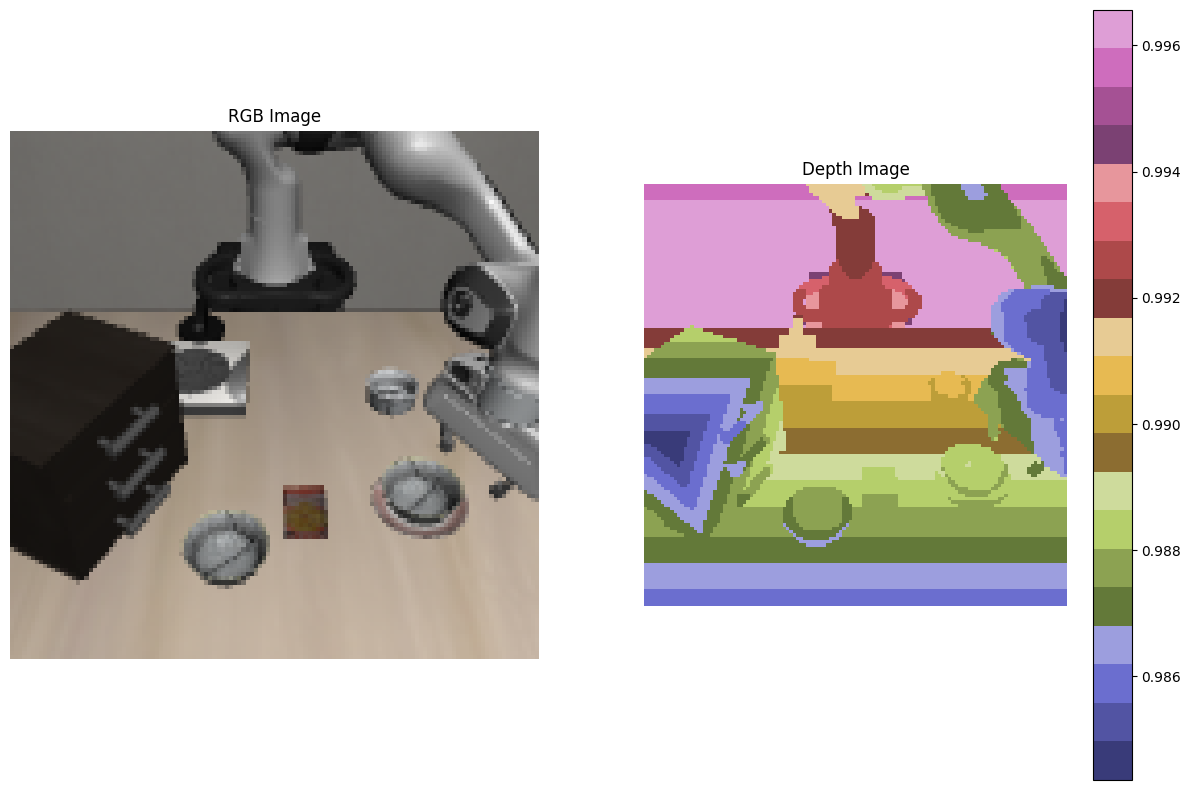

In [ ]:
visualize_rgb_depth(rgb_img, depth_img) 